In [18]:
# Setup
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from sklearn.linear_model import LogisticRegression

# Import custom methods
import sys
sys.path.append("../") # go to parent dir
from utilities import utilities as utils

# Ignore deprecation warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Read in data, check formatting compatibility
pickle_path = Path('/Users/andreakeane/Documents/DataScience/GridCure_Problems/pickles/')
fig_path = Path('/Users/andreakeane/Documents/DataScience/GridCure_Problems/figures/')

labels = pd.read_pickle(pickle_path / "labels.pkl")
X = pd.read_pickle(pickle_path / "X_b.pkl")
y = pd.read_pickle(pickle_path / "y_b.pkl")

if X.shape[0] != y.shape[0]: 
    message = '''ERROR. Dataframe shapes don't match.\n
                 X Rows: {}
                 y Rows: {}'''.format(X.shape, y.shape)
    raise ValueError(message)

In [15]:
# Remove houses without EVs
houses_woEV = utils.get_pickle(pickle_path / "houses_woEV.pkl")
print("{} Houses without EVs".format(len(houses_woEV)))

y = y.drop(houses_woEV, errors='ignore')
X = X.drop(houses_woEV, errors='ignore')

print("Features:")
for feature in X.columns.tolist(): 
    print("  " + feature)

1105 Houses without EVs
Features:
  value
  diff
  h8_avg
  h24_avg
  h24_min
  h24_max
  h72_avg
  diff_2
  diff_3
  diff_5


In [17]:
# Scale and Split Training Data
X_train, X_test, y_train, y_test = utils.scale_split_data(X, y, 'b')

In [5]:
# # Takes a long time to run --> Pickle results
# # KNN - K selection
# # Only odds to prevent ties
# from sklearn.neighbors import KNeighborsClassifier
# k_neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
# scores = pd.DataFrame(columns=['neighbors', 'train', 'test'])
# for k in k_neighbors:
#     neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train) 
#     scores = scores.append({'neighbors': k, 
#                             'train': neigh.score(X_train,y_train),
#                             'test': neigh.score(X_test,y_test)}, 
#                            ignore_index=True)

# scores.to_pickle(pickle_path / "knn_scores.pkl")

In [24]:
scores = pd.read_pickle(pickle_path / "knn_scores.pkl")
scores.round(3)

,neighbors,train,test
0,1.0,1.000,0.951
1,3.0,0.975,0.957
2,5.0,0.970,0.959
3,7.0,0.967,0.958
4,9.0,0.965,0.958
5,11.0,0.964,0.958
6,13.0,0.963,0.959
7,15.0,0.962,0.959
8,17.0,0.962,0.958
9,19.0,0.961,0.958


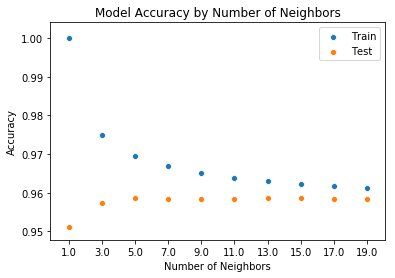

In [10]:
sns.scatterplot(x=scores['neighbors'], y=scores['train'])
sns.scatterplot(x=scores['neighbors'], y=scores['test'])
plt.xticks(scores['neighbors'], scores['neighbors'])
leg = plt.legend(('Train', 'Test'), frameon=True) 
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Number of Neighbors')

plt.savefig(fig_path / "b2_knn_compare.png")
plt.show()

In [11]:
n = 13
knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train) 

print("Train Score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test Score: {:.3f}".format(knn.score(X_test, y_test)))

utils.make_pickle(knn, pickle_path / 'b_knn.pkl')

Train Score: 0.963
Test Score: 0.959


### ROC and PR Analysis

ROC AUC Score: 0.951
Average Precision Score: 0.756
Balanced Accuracy Score: 0.809


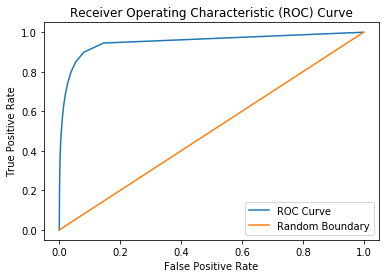

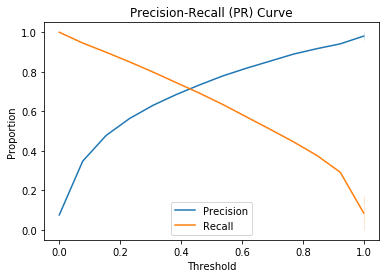

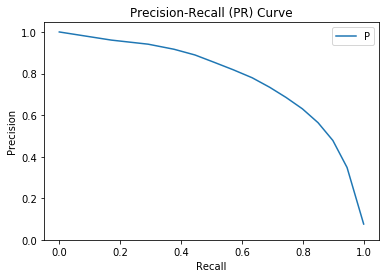

Training Score, 0.963
Testing Score, 0.959
ROC AUC, 0.951
Average Precision Score, 0.756
Balanced Accuracy Score, 0.809


In [12]:
utils.model_evaluation(knn, X_train, y_train, X_test, y_test, 'b_knn', fig_path)